In [1]:
import os
import cv2
import numpy as np
import tqdm as tqdm

In [2]:
from tqdm import tqdm
REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg"in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats: ", self.catcount)
        print("Dogs: ", self.dogcount)
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

PetImages/Cat


  0%|                                                                              | 11/12501 [00:00<01:58, 105.82it/s]

PetImages/Dog


100%|████████████████████████████████████████████████████████████████████████████| 12501/12501 [05:15<00:00, 39.60it/s]


Cats:  12476
Dogs:  12470


In [3]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [4]:
print(len(training_data))

24946


In [5]:
print(training_data[0])

[array([[129, 104,  87, ...,  49,  90, 106],
       [131,  95,  83, ...,  57,  94, 112],
       [120, 101,  96, ...,  68, 109,  84],
       ...,
       [ 45,  58,  35, ...,  53,  52,  63],
       [ 47,  63,  42, ...,  61,  44,  70],
       [ 61,  77,  41, ...,  41,  45,  36]], dtype=uint8)
 array([0., 1.])]


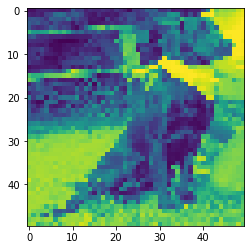

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0])
plt.show()

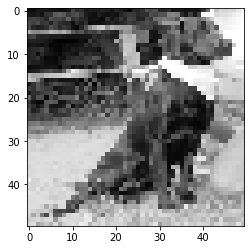

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap = "gray")
plt.show()

In [ ]:
!pip install torch
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def ___init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5) #5 is for the sliding window i.e. model will have 5x5 sliding window over the image
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        # method to flatten input for fully connected layers
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512) # flattening
        self.fc2 = nn.Linear(512, 2)
        
    def convs(self, x):
        # max pooling with a 2x2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
        
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim = 1)
    
net = Net()
print(net)